In [1]:
import keras
from keras import layers
import datetime, os
import tensorflow as tf


In [2]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [3]:
encoding_dims = 32

input_img = keras.Input(shape = (784, ))

encoded = layers.Dense(encoding_dims, activation="relu")(input_img)

decoded = layers.Dense(784, activation="sigmoid")(encoded)

autoencoder = keras.Model(input_img, decoded)

In [4]:
encoder = keras.Model(input_img, encoded)

In [5]:
encoded_input = keras.Input(shape=(encoding_dims, ))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 5s 0us/step


In [8]:
print(f"xtrain -{x_train.shape}; xtest-{x_test.shape}")
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

xtrain -(60000, 28, 28); xtest-(10000, 28, 28)
(60000, 784)
(10000, 784)


In [9]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


In [10]:

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
               callbacks = [tensorboard_callback])

Epoch 1/10
235/235 [==============================] - 57s 20ms/step - loss: 0.2727 - val_loss: 0.1887
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1710 - val_loss: 0.1541
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1452 - val_loss: 0.1346
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1293 - val_loss: 0.1223
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1190 - val_loss: 0.1137
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1118 - val_loss: 0.1075
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1063 - val_loss: 0.1028
Epoch 8/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1022 - val_loss: 0.0995
Epoch 9/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0993 - val_loss: 0.0970
Epoch 10/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0974 - val_loss: 0.09

In [11]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

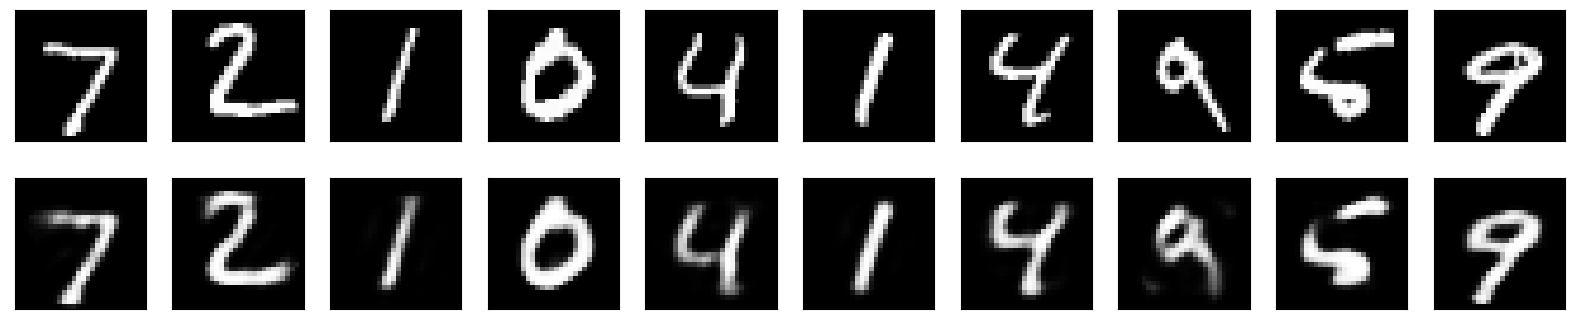

In [12]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
%tensorboard --logdir logs

In [19]:

# gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.95,
#                             allow_growth=True)

# # set number of GPU devices
# device_count = {"GPU": self.config.gpu_count}

# session_config = tf.ConfigProto(
#       allow_soft_placement=True,
#       log_device_placement=False,
#       device_count=device_count,
#       gpu_options=gpu_options)

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
session = InteractiveSession(config=config)
